In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
url= "https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes-DROP-ROWS.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...
387,753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
388,755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
389,760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
390,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['DiabetesPedigreeFunction'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,21,0
1,0,137.0,40.0,35.0,168.0,43.1,33,1
2,3,78.0,50.0,32.0,88.0,31.0,26,1
3,2,197.0,70.0,45.0,543.0,30.5,53,1
4,1,189.0,60.0,23.0,846.0,30.1,59,1
...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,510.0,43.3,26,1
388,1,128.0,88.0,39.0,110.0,36.5,37,1
389,2,88.0,58.0,26.0,16.0,28.4,22,0
390,10,101.0,76.0,48.0,180.0,32.9,63,0


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.069814,0.270118
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.350804,1.000000


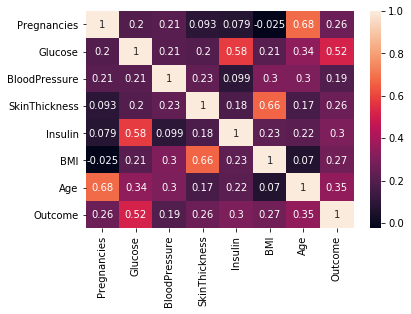

In [5]:
sb.heatmap(df.corr(), annot=True)

In [6]:
labels = df.loc[:,'Outcome'].values
features = df.loc[:,df.columns!='Outcome'].values
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

130 262


In [7]:
scaler=MinMaxScaler((0,1))
x=scaler.fit_transform(features)
y=labels

In [8]:
xTrain,xTest,yTrain,yTest=tts(x, y, test_size=0.2, random_state=69)

In [9]:
clf=LogisticRegression()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        41
           1       0.79      0.50      0.61        38

    accuracy                           0.70        79
   macro avg       0.72      0.69      0.68        79
weighted avg       0.72      0.70      0.68        79



In [10]:
clf=RandomForestClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        41
           1       0.81      0.55      0.66        38

    accuracy                           0.72        79
   macro avg       0.74      0.72      0.71        79
weighted avg       0.74      0.72      0.71        79



In [11]:
clf=SVC()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        41
           1       0.79      0.50      0.61        38

    accuracy                           0.70        79
   macro avg       0.72      0.69      0.68        79
weighted avg       0.72      0.70      0.68        79



In [12]:
clf=KNeighborsClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77        41
           1       0.83      0.53      0.65        38

    accuracy                           0.72        79
   macro avg       0.75      0.71      0.71        79
weighted avg       0.75      0.72      0.71        79



In [13]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = dtree.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72        41
           1       0.74      0.45      0.56        38

    accuracy                           0.66        79
   macro avg       0.68      0.65      0.64        79
weighted avg       0.68      0.66      0.64        79



In [14]:
clf=BaggingClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.63      0.88      0.73        41
           1       0.77      0.45      0.57        38

    accuracy                           0.67        79
   macro avg       0.70      0.66      0.65        79
weighted avg       0.70      0.67      0.65        79

